In [6]:
# import necessary library
import psycopg2
#import library pandas
import pandas as pd
#import library sqlio
import pandas.io.sql as sqlio

#create database connection variable 
conn = psycopg2.connect(user="postgres", password="root1234", host="localhost", database="DVDRental")

#### Insert
* allows to insert a new row into a table

**Syntex:**

INSERT INTO table_name(column1, column2, …) <br>
VALUES (value1, value2, …);

In [7]:
query = """SELECT * FROM links;"""
sqlio.read_sql_query(query,conn)

,id,url,name,description,last_update
0,2,https://www.postgresqltutorial.com,PostgreSQL Tutorial,None,None
1,3,http://www.postgresql.org,PostgreSQL,None,None
2,4,http://www.postgresql.org,PostgreSQL,None,None


In [8]:
# insert data into links table
query = """INSERT INTO links (url, name)
           VALUES('https://www.postgresqltutorial.com',
           'PostgreSQL Tutorial');"""
sqlio.read_sql_query(query,conn)

TypeError: 'NoneType' object is not iterable

#### RETURNING clause with Insert statement

The INSERT statement also has an optional RETURNING clause that returns the information of the inserted row.

#### DBeaver

Update:
* allows you to modify data in a table.

In [ ]:
# Update Syntex
UPDATE patient
SET Pat_Name = 'James' 
WHERE Pat_ID = 1;

### Update Join:
* update data in a table based on values in another table.

#### Syntex:
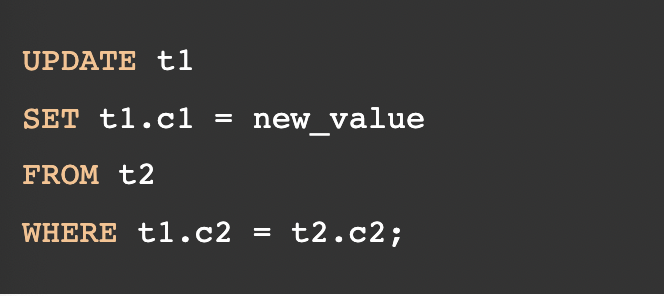

### Delete
* allows you to delete one or more rows from a table.

#### **Syntex: <br>
DELETE FROM table_name <br>
WHERE condition; **

To return the deleted row(s) to the client, you use the RETURNING clause as follows:
**DELETE FROM table_name <br>
WHERE condition <br>
RETURNING (select_list | *) **

#### Using PostgreSQL DELETE to delete all rows from the table

DELETE FROM links;

### Upsert
* The term UPSERT is referred to as 'merge' in relational database.
* Upsert is combination of Update and insert.
* When a new row is inserted, PostgreSQL will update the row if it already exists, otherwise it will insert a new row.

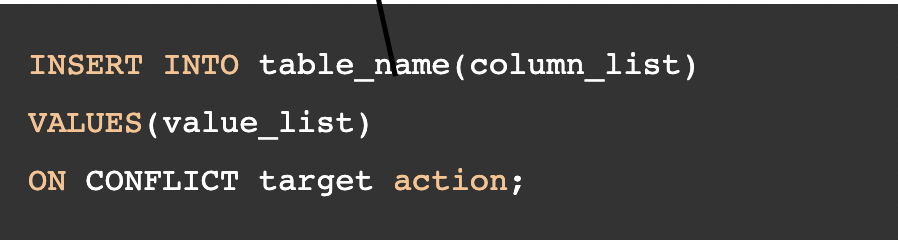

#### PostgreSQL added the ON CONFLICT target action clause to the INSERT statement to support the upsert feature.

In Syntex, the target can be one of the following:
   * (column_name) -  a column name
   * ON CONSTRAINT constraint_name: the constraint name could be the name of the UNIQUE constraint.
   * WHERE predicate - a WHERE clause with a predicate

The action can be one of the following:
* DO NOTHING - means do nothing if the row already exists in the table.
* DO UPDATE SET column_1 = value_1,... WHERE condition- update some fields in the table.

UPSERT feature is similar to the 'insert on duplicate key update statement' in MySQL.

--  customer for UPSERT command

select * from doctor;


-- update in action
insert into doctor(doc_id,doc_name)
values(7,'Avengers')
on conflict(doc_id)
do update set doc_name=EXCLUDED.doc_name; 

-- do nothing in action
insert into doctor(doc_id,doc_name)
values(8,'Mr Beans')
on conflict(doc_id)
do nothing; 


